# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the good will of the brand of the car features of the car,horsepower and the mileage it gives and many more.car price prediction is one of the major research areas in machine learning .so if you want to learn how to train a car prediction model then this project is for you.

# Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Gathering and Processing

In [27]:
import os
os.chdir('D:/')
car_dataset=pd.read_csv('cars.csv')
car_dataset


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA(Exploratory data analysis)

In [28]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
car_dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [32]:
car_dataset.shape

(301, 9)

In [33]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Check the distribution of categorical data


In [54]:
print(car_dataset.Fuel_Type.value_counts())
print('*'*30)
print(car_dataset.Selling_type.value_counts())
print('*'*30)
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
******************************
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
******************************
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [64]:
#fuel_type
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#Selling_type
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
#Transmission
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [65]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


split the data

In [96]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [97]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [98]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Training the data

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=23)

# Linear regression model

In [106]:
lr=LinearRegression()

In [107]:
lr.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [108]:
# prediction on training data
prediction=lr.predict(X_train)

metrics

In [111]:
error_score=metrics.r2_score(prediction,Y_train)
print("R Squared error:",error_score)

R Squared error: 0.8698617752450049


Visualize the actual prices and predicted prices

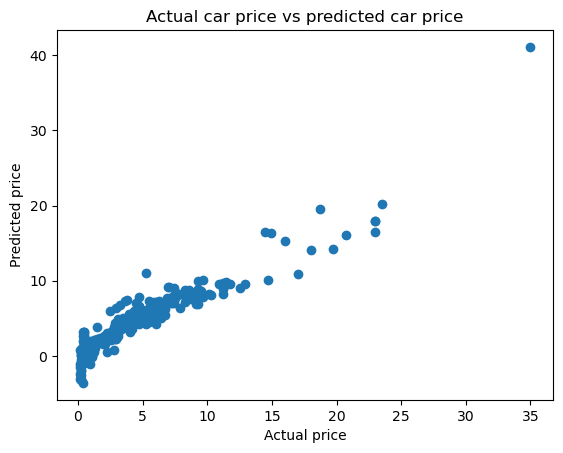

In [114]:
plt.scatter(Y_train,prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual car price vs predicted car price')
plt.show()

Prediction on testing data

In [115]:
# prediction on testing data
prediction1=lr.predict(X_test)

In [121]:
error_score1=metrics.r2_score(prediction1,Y_test)
print("R Squared error:",error_score1)

R Squared error: 0.7616930347503336


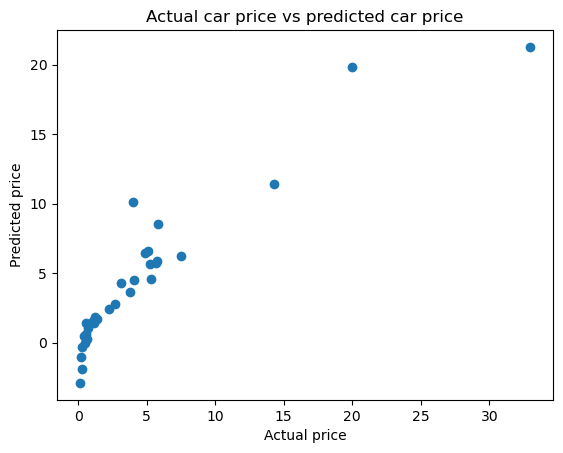

In [119]:
plt.scatter(Y_test,prediction1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual car price vs predicted car price')
plt.show()

# LassoRegression

In [125]:
lasso=Lasso()

In [126]:
lasso.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [127]:
# prediction on training data
prediction2=lasso.predict(X_train)

# metrics

In [128]:
error_score2=metrics.r2_score(prediction2,Y_train)
print("R Squared error:",error_score2)

R Squared error: 0.798339996647975


Visualize the actual prices and predicted prices

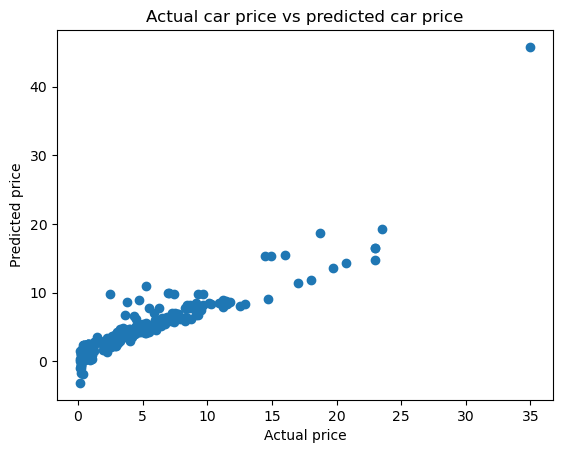

In [129]:
plt.scatter(Y_train,prediction2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual car price vs predicted car price')
plt.show()